# Prediction of house prices in Nigeria

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sklearn 

In [4]:
%matplotlib inline

In [5]:
dataset = pd.read_csv("nigeria_houses_data.csv")

In [6]:
dataset.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [7]:
dataset.tail()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
24321,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja,15000000.0
24322,4.0,5.0,5.0,4.0,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0
24325,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [9]:
dataset.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


# unique counts of real estate locations

In [10]:
dataset['town'].nunique() # the dataset contains 189 unique towns

189

In [11]:
dataset['state'].nunique() # the dataset contains 25 unique states in nigeria

25

In [12]:
dataset.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'price'],
      dtype='object')

# Data exploration and visualization

<AxesSubplot:>

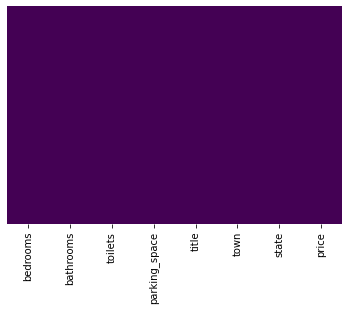

In [13]:
sns.heatmap(dataset.isnull(),yticklabels = False, cbar = False, cmap = 'viridis') #there are no null data entries.

In [14]:
#sns.countplot(x='town', data = dataset, hue ='state')

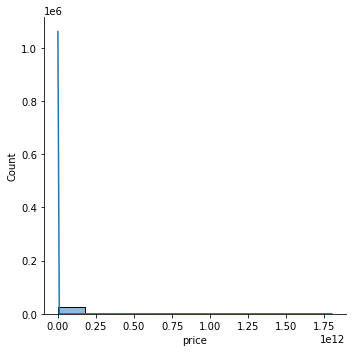

In [15]:
sns.displot(dataset['price'].dropna(), bins =10, kde = True )

# Linear regression algorithm

In [16]:
#model selection and model fittings here.

In [17]:
dataset.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'price'],
      dtype='object')

In [18]:
X = dataset[['bedrooms', 'bathrooms', 'toilets', 'parking_space']]

In [19]:
y = dataset['price']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X_train, y_train)

LinearRegression()

In [25]:
print(lm.intercept_)

-1559909913.098781


In [26]:
lm.coef_

array([ 2.65436482e+08,  1.32198583e+08, -1.00790904e+08,  1.62878861e+08])

In [27]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns =['coefficients'])

In [28]:
cdf # a 1 unit increase in the avearge bedroom is associate with an increase

,coefficients
bedrooms,2.654365e+08
bathrooms,1.321986e+08
toilets,-1.007909e+08
parking_space,1.628789e+08


# predictions

In [29]:
#these are the predicted prices

In [30]:
predict = lm.predict(X_test)

In [31]:
predict

array([ 1.78191275e+08,  1.53124131e+07,  1.53124131e+07, ...,
       -7.71935049e+08,  4.49533757e+07,  3.12156575e+08])

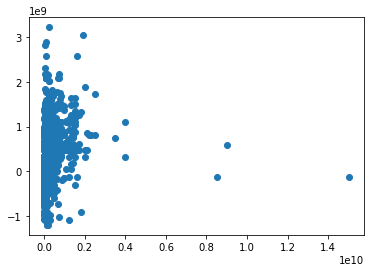

In [32]:
plt.scatter(y_test, predict) # this shows that there is no correlation between the actaul pricesand the predicted prices.

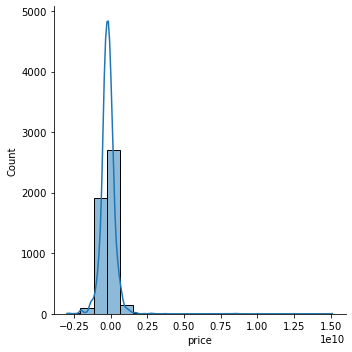

In [33]:
sns.displot(y_test-predict, bins = 20, kde = True)

# Evaluation metrics

In [34]:
from sklearn import metrics

In [39]:
print(metrics.mean_absolute_error(y_test, predict))
print(metrics.mean_squared_error(y_test, predict))
print(np.sqrt(metrics.mean_squared_error(y_test,predict)))

362686850.2769207
3.06916967865267e+17
554000873.5239205
